In [1]:
from tensorflow import keras
import numpy as np
import json

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
file = open('Wizard.txt','r')
#print(file.read())
sample=""
for x in file:
    sample = sample+x
print(sample)

﻿Folklore, legends, myths and fairy tales have followed childhood
through the ages, for every healthy youngster has a wholesome and
instinctive love for stories fantastic, marvelous and manifestly
unreal. The winged fairies of Grimm and Andersen have brought more
happiness to childish hearts than all other human creations.

Yet the old time fairy tale, having served for generations, may now be
classed as "historical" in the children's library; for the time has
come for a series of newer "wonder tales" in which the stereotyped
genie, dwarf and fairy are eliminated, together with all the horrible
and blood-curdling incidents devised by their authors to point a
fearsome moral to each tale. Modern education includes morality;
therefore the modern child seeks only entertainment in its wonder tales
and gladly dispenses with all disagreeable incident.

Having this thought in mind, the story of "The Wonderful Wizard of Oz"
was written solely to please children of today. It aspires to being a
m

In [4]:
def remove_space(sample):
    sample_f=""
    for i in sample:
        if i=="\n":
            i = " "
        sample_f = sample_f+i
    return sample_f

In [5]:
sample_f = remove_space(sample)
print(sample_f)

﻿Folklore, legends, myths and fairy tales have followed childhood through the ages, for every healthy youngster has a wholesome and instinctive love for stories fantastic, marvelous and manifestly unreal. The winged fairies of Grimm and Andersen have brought more happiness to childish hearts than all other human creations.  Yet the old time fairy tale, having served for generations, may now be classed as "historical" in the children's library; for the time has come for a series of newer "wonder tales" in which the stereotyped genie, dwarf and fairy are eliminated, together with all the horrible and blood-curdling incidents devised by their authors to point a fearsome moral to each tale. Modern education includes morality; therefore the modern child seeks only entertainment in its wonder tales and gladly dispenses with all disagreeable incident.  Having this thought in mind, the story of "The Wonderful Wizard of Oz" was written solely to please children of today. It aspires to being a m

In [6]:
def filtering(sample):
    listw= sample.split(" ")
    listn=[]
    for i in listw:
        a = i
        flag=0
        if "." in a:
            b="."
            t = a.split(b)
            listn.append(t[0])
            flag=1
        
        elif  "," in a:
            b = ","
            t = a.split(b)
            listn.append(t[0])
            flag=1
        elif '"' in a:
            b='"'
            t = a.split(b)
            if t[0]=="":
                listn.append(t[1])
            else:
                listn.append(t[0])
            flag=1
        elif "/" in a:
            b="/"
            t = a.split(b)
            listn.append(t[0])
            listn.append(t[1])
            flag=1
        elif "?" in i:
            b = "?"
            t = a.split(b)
            listn.append(t[0])
            listn.append(t[1])
            t[1]=b
            flag=1
        
        elif "!" in a:
            b = "!"
            t = i.split(b)
            listn.append(t[0])
            listn.append(t[1])
            t[1]=b
            flag=1

        if flag==0:
            listn.append(a)
    return listn          

In [7]:
a = filtering(sample_f[0:1005])
print(a)

['\ufeffFolklore', 'legends', 'myths', 'and', 'fairy', 'tales', 'have', 'followed', 'childhood', 'through', 'the', 'ages', 'for', 'every', 'healthy', 'youngster', 'has', 'a', 'wholesome', 'and', 'instinctive', 'love', 'for', 'stories', 'fantastic', 'marvelous', 'and', 'manifestly', 'unreal', 'The', 'winged', 'fairies', 'of', 'Grimm', 'and', 'Andersen', 'have', 'brought', 'more', 'happiness', 'to', 'childish', 'hearts', 'than', 'all', 'other', 'human', 'creations', '', 'Yet', 'the', 'old', 'time', 'fairy', 'tale', 'having', 'served', 'for', 'generations', 'may', 'now', 'be', 'classed', 'as', 'historical', 'in', 'the', "children's", 'library;', 'for', 'the', 'time', 'has', 'come', 'for', 'a', 'series', 'of', 'newer', 'wonder', 'tales', 'in', 'which', 'the', 'stereotyped', 'genie', 'dwarf', 'and', 'fairy', 'are', 'eliminated', 'together', 'with', 'all', 'the', 'horrible', 'and', 'blood-curdling', 'incidents', 'devised', 'by', 'their', 'authors', 'to', 'point', 'a', 'fearsome', 'moral', 't

In [8]:
sample_words = filtering(sample_f)
print(sample_words)

['\ufeffFolklore', 'legends', 'myths', 'and', 'fairy', 'tales', 'have', 'followed', 'childhood', 'through', 'the', 'ages', 'for', 'every', 'healthy', 'youngster', 'has', 'a', 'wholesome', 'and', 'instinctive', 'love', 'for', 'stories', 'fantastic', 'marvelous', 'and', 'manifestly', 'unreal', 'The', 'winged', 'fairies', 'of', 'Grimm', 'and', 'Andersen', 'have', 'brought', 'more', 'happiness', 'to', 'childish', 'hearts', 'than', 'all', 'other', 'human', 'creations', '', 'Yet', 'the', 'old', 'time', 'fairy', 'tale', 'having', 'served', 'for', 'generations', 'may', 'now', 'be', 'classed', 'as', 'historical', 'in', 'the', "children's", 'library;', 'for', 'the', 'time', 'has', 'come', 'for', 'a', 'series', 'of', 'newer', 'wonder', 'tales', 'in', 'which', 'the', 'stereotyped', 'genie', 'dwarf', 'and', 'fairy', 'are', 'eliminated', 'together', 'with', 'all', 'the', 'horrible', 'and', 'blood-curdling', 'incidents', 'devised', 'by', 'their', 'authors', 'to', 'point', 'a', 'fearsome', 'moral', 't

In [9]:
def unique_words(sample_words):
    unique=[]
    for i in sample_words:
        if i not in unique:
            unique.append(i)
    return unique

In [10]:
word_list = unique_words(sample_words)
print(word_list)
#word_list.append('L')
#word_list.append('cannot')
#word_list.append('Mr')

['\ufeffFolklore', 'legends', 'myths', 'and', 'fairy', 'tales', 'have', 'followed', 'childhood', 'through', 'the', 'ages', 'for', 'every', 'healthy', 'youngster', 'has', 'a', 'wholesome', 'instinctive', 'love', 'stories', 'fantastic', 'marvelous', 'manifestly', 'unreal', 'The', 'winged', 'fairies', 'of', 'Grimm', 'Andersen', 'brought', 'more', 'happiness', 'to', 'childish', 'hearts', 'than', 'all', 'other', 'human', 'creations', '', 'Yet', 'old', 'time', 'tale', 'having', 'served', 'generations', 'may', 'now', 'be', 'classed', 'as', 'historical', 'in', "children's", 'library;', 'come', 'series', 'newer', 'wonder', 'which', 'stereotyped', 'genie', 'dwarf', 'are', 'eliminated', 'together', 'with', 'horrible', 'blood-curdling', 'incidents', 'devised', 'by', 'their', 'authors', 'point', 'fearsome', 'moral', 'each', 'Modern', 'education', 'includes', 'morality;', 'therefore', 'modern', 'child', 'seeks', 'only', 'entertainment', 'its', 'gladly', 'dispenses', 'disagreeable', 'incident', 'Havi

In [11]:
def word_to_int(sample_words):
    length = len(sample_words)
    dic ={}
    dic[0] = ' '
    for i in range(0,length):
        dic[i+1]=sample_words[i]
    return dic

In [12]:
word_dic = word_to_int(word_list)
print(word_dic)

{0: ' ', 1: '\ufeffFolklore', 2: 'legends', 3: 'myths', 4: 'and', 5: 'fairy', 6: 'tales', 7: 'have', 8: 'followed', 9: 'childhood', 10: 'through', 11: 'the', 12: 'ages', 13: 'for', 14: 'every', 15: 'healthy', 16: 'youngster', 17: 'has', 18: 'a', 19: 'wholesome', 20: 'instinctive', 21: 'love', 22: 'stories', 23: 'fantastic', 24: 'marvelous', 25: 'manifestly', 26: 'unreal', 27: 'The', 28: 'winged', 29: 'fairies', 30: 'of', 31: 'Grimm', 32: 'Andersen', 33: 'brought', 34: 'more', 35: 'happiness', 36: 'to', 37: 'childish', 38: 'hearts', 39: 'than', 40: 'all', 41: 'other', 42: 'human', 43: 'creations', 44: '', 45: 'Yet', 46: 'old', 47: 'time', 48: 'tale', 49: 'having', 50: 'served', 51: 'generations', 52: 'may', 53: 'now', 54: 'be', 55: 'classed', 56: 'as', 57: 'historical', 58: 'in', 59: "children's", 60: 'library;', 61: 'come', 62: 'series', 63: 'newer', 64: 'wonder', 65: 'which', 66: 'stereotyped', 67: 'genie', 68: 'dwarf', 69: 'are', 70: 'eliminated', 71: 'together', 72: 'with', 73: 'hor

In [13]:
def to_one_hot(word_dic):
    dic={}
    a=[]
    for i in range(0,len(word_dic)):
        a.append(i)
    one = keras.utils.to_categorical(a)
    for i in word_dic:
        dic[word_dic[i]] = one[i]
    return dic

In [14]:
word_enc = to_one_hot(word_dic)
print(word_enc)

{' ': array([1., 0., 0., ..., 0., 0., 0.], dtype=float32), '\ufeffFolklore': array([0., 1., 0., ..., 0., 0., 0.], dtype=float32), 'legends': array([0., 0., 1., ..., 0., 0., 0.], dtype=float32), 'myths': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'and': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'fairy': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'tales': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'have': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'followed': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'childhood': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'through': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'the': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'ages': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'for': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'every': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 'healthy': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32

In [15]:
list_sent = sample_f.split('.')
print(list_sent)

['\ufeffFolklore, legends, myths and fairy tales have followed childhood through the ages, for every healthy youngster has a wholesome and instinctive love for stories fantastic, marvelous and manifestly unreal', ' The winged fairies of Grimm and Andersen have brought more happiness to childish hearts than all other human creations', '  Yet the old time fairy tale, having served for generations, may now be classed as "historical" in the children\'s library; for the time has come for a series of newer "wonder tales" in which the stereotyped genie, dwarf and fairy are eliminated, together with all the horrible and blood-curdling incidents devised by their authors to point a fearsome moral to each tale', ' Modern education includes morality; therefore the modern child seeks only entertainment in its wonder tales and gladly dispenses with all disagreeable incident', '  Having this thought in mind, the story of "The Wonderful Wizard of Oz" was written solely to please children of today', ' 

In [16]:
def sent_to_words(x):
    listsw1=[]
    for i in x:
        b=[]
        a = filtering(i)
        listsw1.append(a)
    return listsw1

In [17]:
listtot = sent_to_words(list_sent)

In [29]:
listsw = sent_to_words(list_sent[0:400])
print(listsw)

[['\ufeffFolklore', 'legends', 'myths', 'and', 'fairy', 'tales', 'have', 'followed', 'childhood', 'through', 'the', 'ages', 'for', 'every', 'healthy', 'youngster', 'has', 'a', 'wholesome', 'and', 'instinctive', 'love', 'for', 'stories', 'fantastic', 'marvelous', 'and', 'manifestly', 'unreal'], ['', 'The', 'winged', 'fairies', 'of', 'Grimm', 'and', 'Andersen', 'have', 'brought', 'more', 'happiness', 'to', 'childish', 'hearts', 'than', 'all', 'other', 'human', 'creations'], ['', '', 'Yet', 'the', 'old', 'time', 'fairy', 'tale', 'having', 'served', 'for', 'generations', 'may', 'now', 'be', 'classed', 'as', 'historical', 'in', 'the', "children's", 'library;', 'for', 'the', 'time', 'has', 'come', 'for', 'a', 'series', 'of', 'newer', 'wonder', 'tales', 'in', 'which', 'the', 'stereotyped', 'genie', 'dwarf', 'and', 'fairy', 'are', 'eliminated', 'together', 'with', 'all', 'the', 'horrible', 'and', 'blood-curdling', 'incidents', 'devised', 'by', 'their', 'authors', 'to', 'point', 'a', 'fearsome'

In [30]:
def max_length(x):
    maxl=0
    for i in x:
        if len(i)>maxl:
            maxl=len(i)
    return maxl

In [31]:
l = max_length(listsw)
print(l)

64


In [32]:
def sent_to_enc(sent,word_enc,lmax):
    #lmax = max_length(listsw)
    p1 = word_enc['legends'].shape[0]
    sent_enc=[]
    #print(sent)
    for i in sent:
        #print(i)
        sent_enc.append(word_enc[i])
    dif = lmax-len(sent_enc)
    for i in range(0,dif):
        sent_enc.append(word_enc[' '])
    return sent_enc

In [33]:
print(listsw[2])

['', '', 'Yet', 'the', 'old', 'time', 'fairy', 'tale', 'having', 'served', 'for', 'generations', 'may', 'now', 'be', 'classed', 'as', 'historical', 'in', 'the', "children's", 'library;', 'for', 'the', 'time', 'has', 'come', 'for', 'a', 'series', 'of', 'newer', 'wonder', 'tales', 'in', 'which', 'the', 'stereotyped', 'genie', 'dwarf', 'and', 'fairy', 'are', 'eliminated', 'together', 'with', 'all', 'the', 'horrible', 'and', 'blood-curdling', 'incidents', 'devised', 'by', 'their', 'authors', 'to', 'point', 'a', 'fearsome', 'moral', 'to', 'each', 'tale']


In [34]:
lmax = max_length(listtot)
print(lmax)

105


In [35]:
def to_input(list_sw,word_enc):
    lmax = max_length(listtot)
    inp=[]
    for i in list_sw:
        a = sent_to_enc(i,word_enc,lmax)
        inp.append(a)
    return inp

In [36]:
inp1 = to_input(listsw,word_enc)
#print(inp1)
inp1 = np.array(inp1)
print(inp1.shape)
print(inp1.dtype)

(400, 105, 3635)
float32


In [37]:
inp1.shape

(400, 105, 3635)

In [38]:
list_val=[]
val=np.zeros((inp1.shape[2]))
for i in inp1:
    val=np.zeros((inp1.shape[2]))
    for j in  i:
        #print("j= ",j)
        val = val + j
        #print("val=  ",val)
    list_val.append(val[1:])
        
#print(list_val)

In [39]:
list_val[0][0:10]

array([1., 1., 1., 3., 1., 1., 1., 1., 1., 1.])

In [40]:
print(list_sent[4])
print(list_sent[5])

  Having this thought in mind, the story of "The Wonderful Wizard of Oz" was written solely to please children of today
 It aspires to being a modernized fairy tale, in which the wonderment and joy are retained and the heartaches and nightmares are left out


In [41]:
final_list=[]
for i in list_val:
    count=1
    s_val =0
    max=0
    for j in i:
        s_val = s_val + count*j
        if(j>max):
            max = j
        count= count+1
    final_list.append([s_val,max])
#print(final_list)
final_list = np.array(final_list)
X = np.array(final_list)

In [42]:
print(X.shape)
#print(X)

(400, 2)


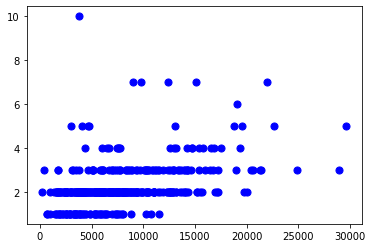

In [43]:
plt.scatter(X[ : , 0], X[ :, 1], s = 50, c = 'b')
plt.show()

In [44]:
Kmean = KMeans(n_clusters=5)
Kmean.fit(X)
label = Kmean.fit_predict(X)
Kmean.cluster_centers_

array([[6.55038583e+03, 2.07086614e+00],
       [9.84420548e+03, 2.39726027e+00],
       [2.16943125e+04, 3.87500000e+00],
       [3.09992800e+03, 1.94400000e+00],
       [1.42005763e+04, 2.91525424e+00]])

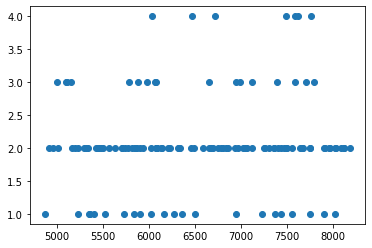

In [45]:
filtered_label0 = X[label == 0]
 
#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

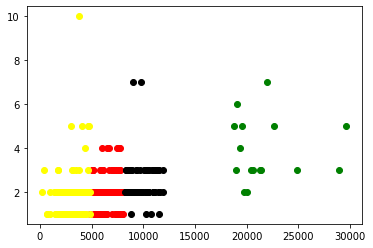

In [46]:
filtered_label0 = X[label == 0]
filtered_label1 = X[label == 1]
filtered_label2 = X[label == 2]
filtered_label3 = X[label == 3]
 
filtered_label4 = X[label == 5]
 
#Plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1] , color = 'red')
plt.scatter(filtered_label1[:,0] , filtered_label1[:,1] , color = 'black')
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'green')
plt.scatter(filtered_label3[:,0] , filtered_label3[:,1] , color = 'yellow')
plt.scatter(filtered_label4[:,0] , filtered_label4[:,1] , color = 'violet')

plt.show()

In [80]:
sample_test=np.array([-3.0,-3.0])
print(sample_test)
second_test=sample_test.reshape(1, -1)
print(second_test)
Kmean.predict(second_test)

[-3. -3.]
[[-3. -3.]]


array([0], dtype=int32)